In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd/content/drive/My Drive/Python Collabs/Univariant Analysis with R and Python

/content/drive/My Drive/Python Collabs/Univariant Analysis with R and Python


In [3]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


# 1-WORKING WITH PYTHON

**Loading the dataset & Visualizing it**

In [4]:
df=pd.read_csv("HR_comma_sep.csv",sep=",")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Summarizing data**

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
j=df.describe()
j.loc[:,"time_spend_company"]

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

**Descriptive statistics for satisfatction level**

In [9]:
df["satisfaction_level"].mean()

0.6128335222348156

In [10]:
df["satisfaction_level"].median()

0.64

In [11]:
df["satisfaction_level"].mode()

0    0.1
dtype: float64

In [12]:
df["satisfaction_level"].min()

0.09

In [13]:
df["satisfaction_level"].max()

1.0

In [14]:
df["satisfaction_level"].quantile()

0.64

In [15]:
df["satisfaction_level"].var()

0.06181720064708763

In [16]:
df["satisfaction_level"].std()

0.24863065106114257

# PLOTTING HISTOGRAM

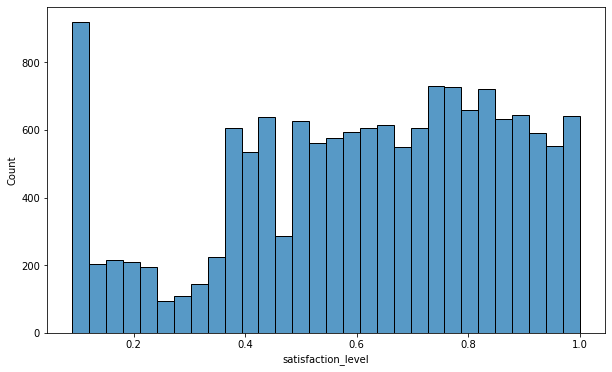

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(df['satisfaction_level'])

**Interpretation:** the distrubition is not normal 

In [45]:
df2=df.copy()
ot=df2.describe()
c='satisfaction_level'
max=(ot.loc['75%',c])+(1.5*((ot.loc['75%',c])-(ot.loc['25%',c])))
min=(ot.loc['25%',c])-(1.5*((ot.loc['75%',c])-(ot.loc['25%',c])))
print(max,min)

def outlier_funct(df2,c,max,min):
  for i in range(0,len(df2[c])):
    if df2[c][i]<min or df2[c][i]>max:
       df2[c][i]=np.nan

1.39 -0.12999999999999995


In [46]:
outlier_funct(df2,c,max,min)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


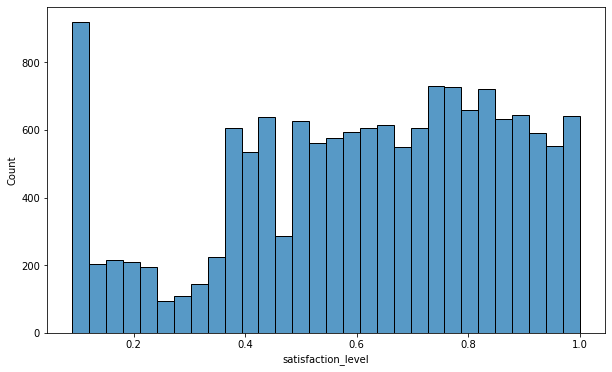

In [47]:
plt.figure(figsize=(10,6))
sns.histplot(df2[c])

In [48]:
df2[c].unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

In [54]:
df2[c].isnull().sum()
df[c].median()

0.64

In [50]:
df3=df2.copy()
for i in range(0,len(df3[c])):
     if not df3[c][i]<10000:
      df3[c][i]=df[c].median()

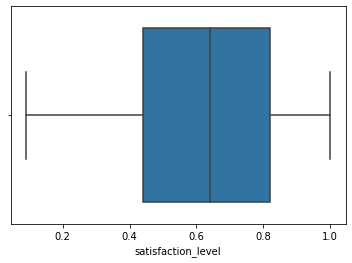

In [55]:
sns.boxplot(x=df["satisfaction_level"])

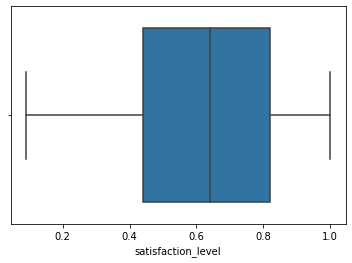

In [56]:
sns.boxplot(x=df3[c])

2 Boxplot : 1 before replacing outliers and the other after

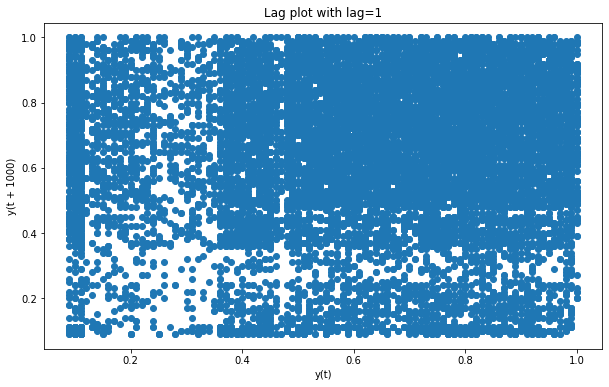

In [57]:
plt.figure(figsize=(10,6))
pd.plotting.lag_plot(df3[c], lag=1000)
plt.title("Lag plot with lag=1")
plt.show()

The lag plot time series is random

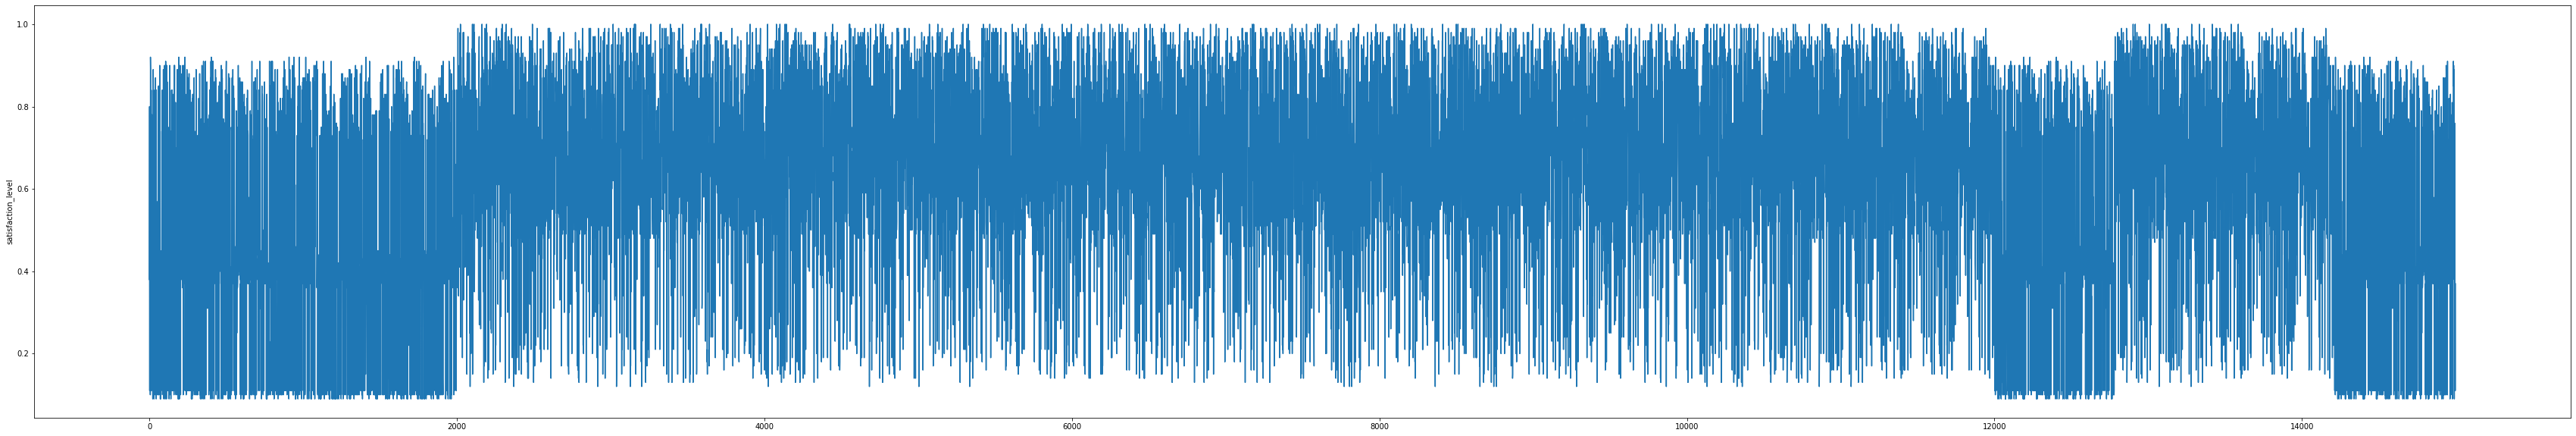

In [63]:
plt.figure(figsize=(60,10))
sns.lineplot(data = df3[c])

Interpretation : No fixed location or fixed variation satisfied



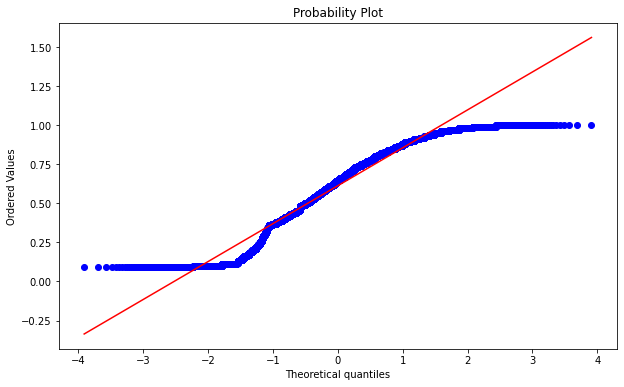

In [61]:
plt.figure(figsize=(10,6))
import scipy.stats as stats
stats.probplot(df[c],plot=plt)
plt.show()